In [169]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:
from __future__ import division
import numpy as np
c = 3e8
G = 6.67e-11
Msolar = 2e30
AU = 1.49e11 #meters
pc = 3.086e16 #parsec in m

The following parameters can be set:

$m_{0,1,2}$ masses of each of components (0,1 = inner, 2 = outer)

$f$ = orbital frequency of inner binary

$e_1$ = initial eccentricity of inner binary

$e_2$ = orbital eccentricity of outer binary

$I$ = orbital inclination

$\gamma$ = initial pericentre angle

$\beta = a_2/a_1$ where $a_{1,2}$ is the semi-major axis of the inner/outer binary

In [229]:
%matplotlib inline
import OrbitalMotion as orb
from plot import *
import waveform

#Set up initial system parameters
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
e1 = 0.5 #eccentricity
beta=100
m2 = 10*Msolar
e2 =0.6
I = 60 * np.pi/180.0 #Inclination
gamma = np.pi/4
nmodes = 100 #number of modes to sum over for GW
iota = 20 * np.pi/180  #angle of L vector w.r.t observer LOS 
D = 1e6 * pc #distance from source to observer 1Gpc

#And some integration parameters
Tint = 5 #years 0.01
#Tres = int(9e4) #Effective timing resolution. Bigger numbers = better
fs = 2 #effective sampling frequency


In [234]:
#ANALYTICAL SOLUTION

#Get the orbital motion
print (Tint*365*24*3600*fs)
motion = orb.get_orbital_evolution(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,fs)
print (len(motion),Tint*365*24*3600*fs)
sys.exit()


#plot_motion(motion) #Plot it if you fancy

#Generate the waveform
constants = np.array([m0+m1, nmodes,iota,m0*m1/(m0+m1),D])
grav = waveform.GW(motion,constants)
plot_GW(grav,f1)

315360000
Get the constants
Set the time
Get some approximations


UnboundLocalError: local variable 'out' referenced before assignment

In [66]:
#NUMERICAL SOLUTION

#Get the orbital motion
numerical_motion = orb.get_orbital_evolution_numerical(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,Tres)
#plot_motion(numerical_motion) Plot it if you fancy

#Generate the waveform
constants = np.array([m0+m1, nmodes,iota])
grav_numerical = waveform.GW(motion,constants)
#plot_GW(grav_numerical)

Numerical evolution has completed


Define the overlap of the function as,

$$ (a|b) = 2 \int^{\infty}_0 \frac{\tilde{a}^*(f)\tilde{b}(f)+\tilde{b}^*(f)\tilde{a}(f)}{P_n(f)} df \ , $$

3.1709791983764586e-06 1.0 315360


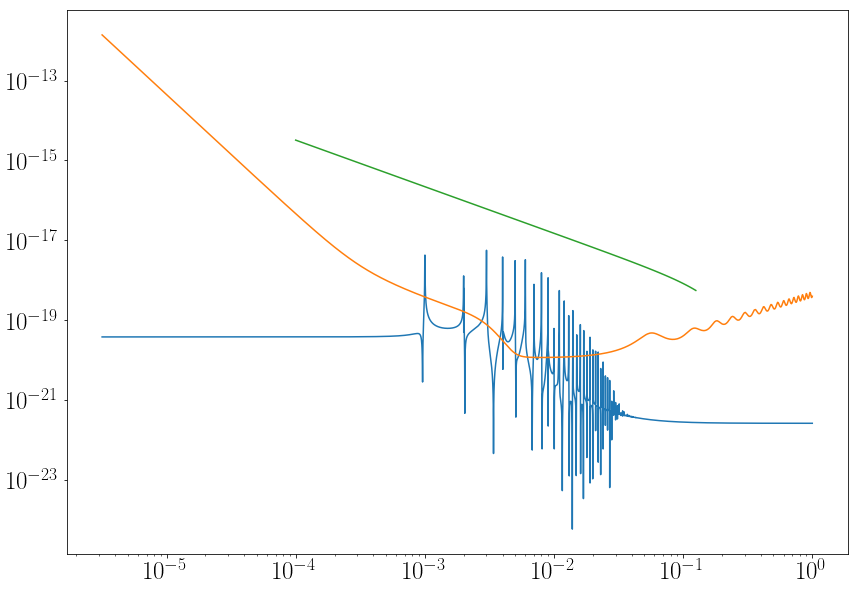

In [227]:
from overlap import overlap

#chirp = (m0*m1)**(3/5)/(m0+m1)**(1/5)
#sym = m0*m1/(m0+m1)**2
#f0 = 2.9740e-1 * sym**2 + 4.4810e-2*sym + 9.5560e-2
#f = np.linspace(1e-4,f0,20)
#PhenomA = np.sqrt(5/24) * (G*chirp/c**3)**(5/6) * f0**(-7/6) / (np.pi**2/3 * (D/c)) * (f/f0)**(-7/6)

#PhenomA = np.sqrt(5/24) * (G*chirp/c**3)**(5/6) * f**(-7/6) / (np.pi**(2/3) * (D/c))

#phase = 2*np.pi*f
#hplus = PhenomA * (1+np.cos(iota)**2)/2 * np.exp(1j * phase)
#hcross = 1j * PhenomA*np.cos(iota)*np.exp(1j * phase)

#hPhenom = np.sqrt(hplus**2 + hcross**2)

#print (PhenomA)
#fphen = f




f,hf, S = overlap(grav,grav_numerical)
plot_GW_frequency(f,hf, S,hPhenom, fphen)